In [62]:
#impoert libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  ## to remove the warning
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.metrics import roc_curve

In [3]:
#loading the data
df=pd.read_csv("bank-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

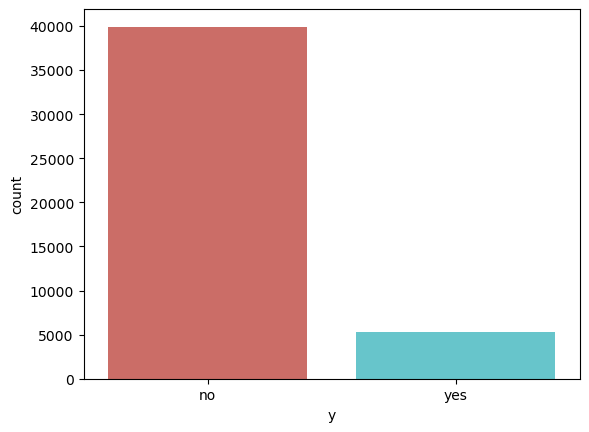

In [8]:
sns.countplot(x='y',data=df, palette='hls')
plt.show()

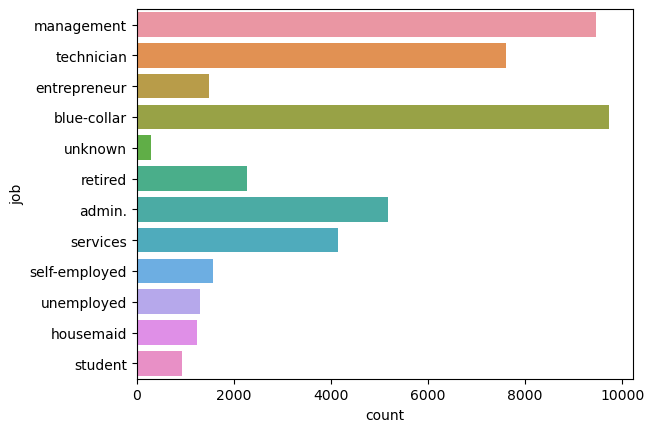

In [9]:
sns.countplot(y="job", data=df)
plt.show()

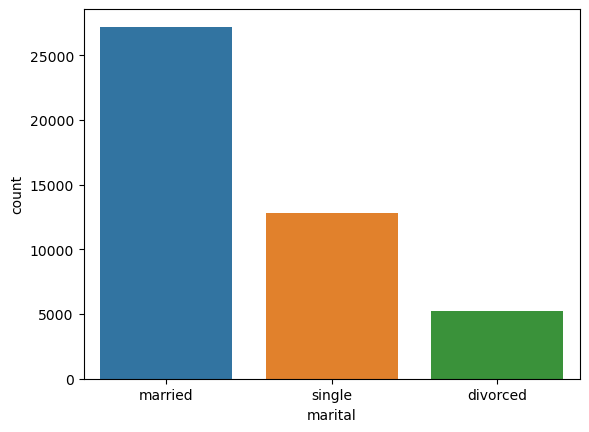

In [10]:
sns.countplot(x="marital", data=df)
plt.show()

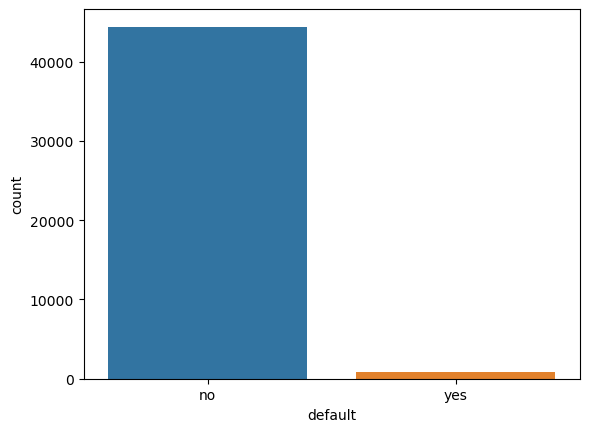

In [11]:
sns.countplot(x="default", data=df)
plt.show()

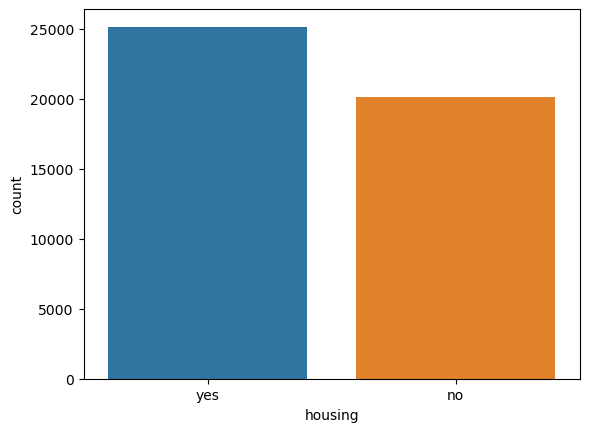

In [12]:
sns.countplot(x="housing", data=df)
plt.show()

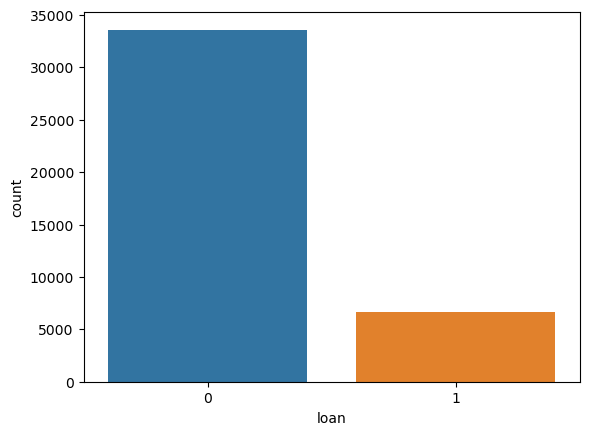

In [72]:
sns.countplot(x="loan", data=df)
plt.show()

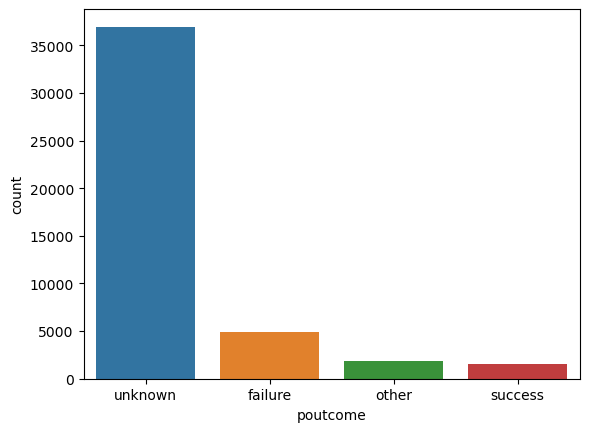

In [14]:
sns.countplot(x="poutcome", data=df)
plt.show()

In [15]:
# Convert target variable into numeric
df.y = df.y.map({'no':0, 'yes':1}).astype('uint8')

Text(0.5, 1.05, 'Pearson correlation of Features')

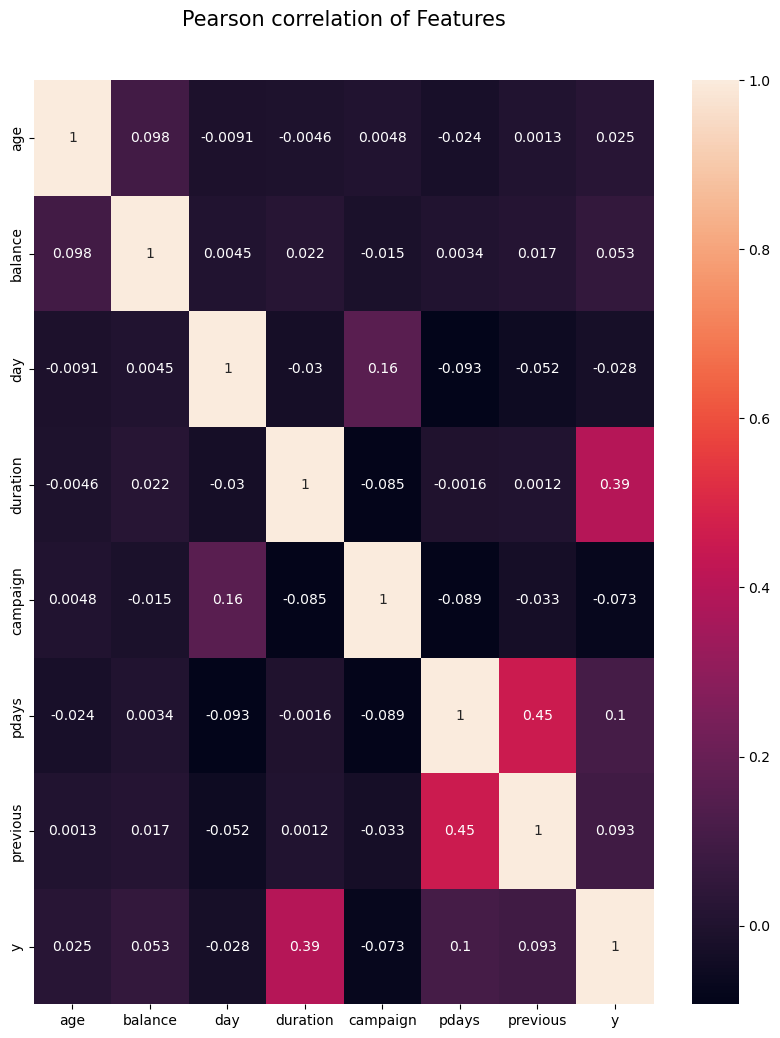

In [17]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10,12))
sns.heatmap(corr, ax=ax, annot=True)
plt.title("Pearson correlation of Features", y=1.05, size=15)

There is no variable highly correlated to y.

In [18]:
#drop marital and contact columns
df.drop(['marital'],axis=1, inplace=True)
df.drop(['contact'],axis=1, inplace=True)
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,0
4,33,unknown,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,0


### changing categorical variable to numerical variable

In [25]:
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,0,2143,1,0,5,5,261,1,-1,0,unknown,0
1,44,technician,secondary,0,29,1,0,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,secondary,0,2,1,1,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,unknown,0,1506,1,0,5,5,92,1,-1,0,unknown,0
4,33,other,unknown,0,1,0,0,5,5,198,1,-1,0,unknown,0


In [33]:
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['education']=le.fit_transform(df['education'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [34]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,2,0,2143,1,0,5,5,261,1,-1,0,3,0
1,44,10,1,0,29,1,0,5,5,151,1,-1,0,3,0
2,33,2,1,0,2,1,1,5,5,76,1,-1,0,3,0
3,47,1,3,0,1506,1,0,5,5,92,1,-1,0,3,0
4,33,5,3,0,1,0,0,5,5,198,1,-1,0,3,0


## Outliers Detection

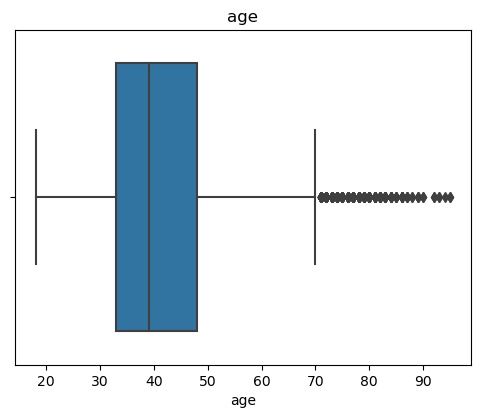

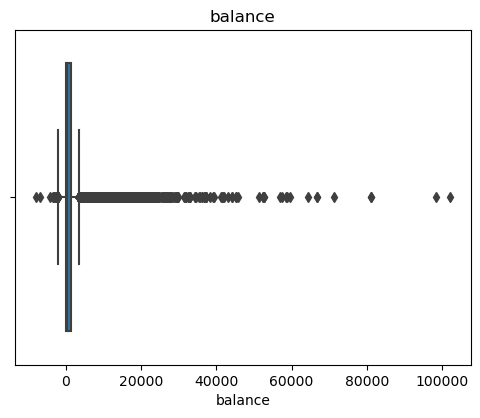

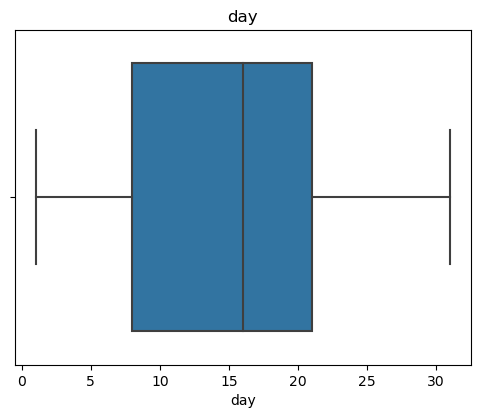

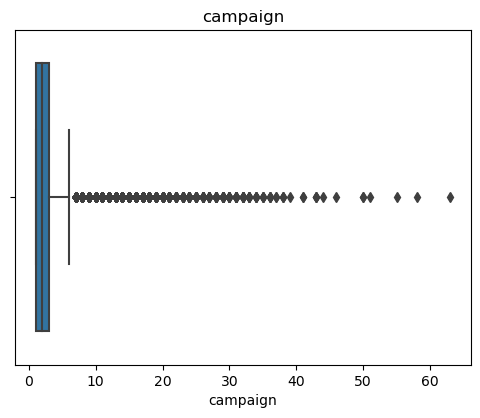

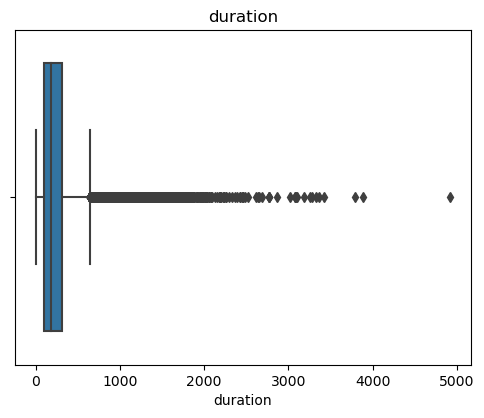

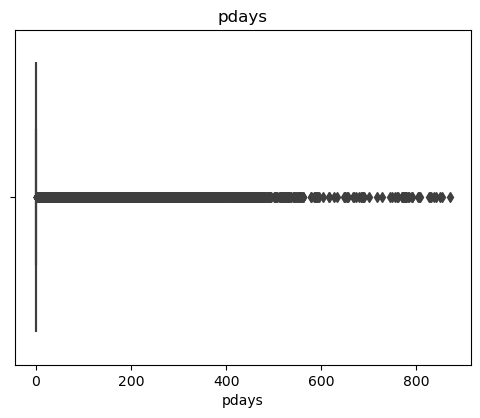

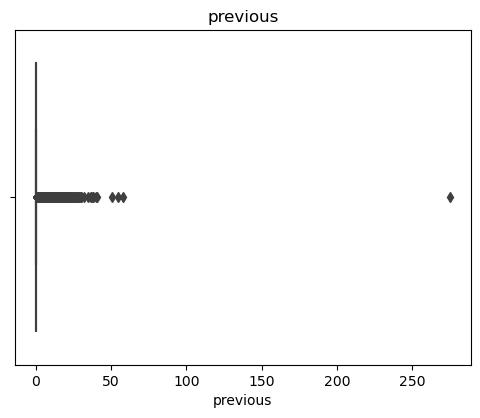

In [37]:
col=df[['age','balance','day','campaign','duration','pdays','previous']]
for i in col:
  n=1
  plt.figure(figsize=(20,20))
  plt.subplot(4,3,1)
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()
  n=n+1

## Removing outliers using Z-score

In [39]:
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


In [40]:
df.shape

(40209, 15)

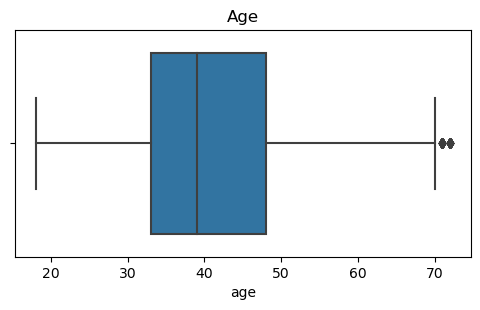

In [41]:
#checking outliers removed ot not
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(df['age'])
plt.title("Age")
plt.show()

## Seprating independent and dependent variables

In [42]:
x=df.drop(['y'],axis=1) #contain all independent variable
y=df['y']  #dependent variable

## Handling imbalanced data

<AxesSubplot:xlabel='y', ylabel='count'>

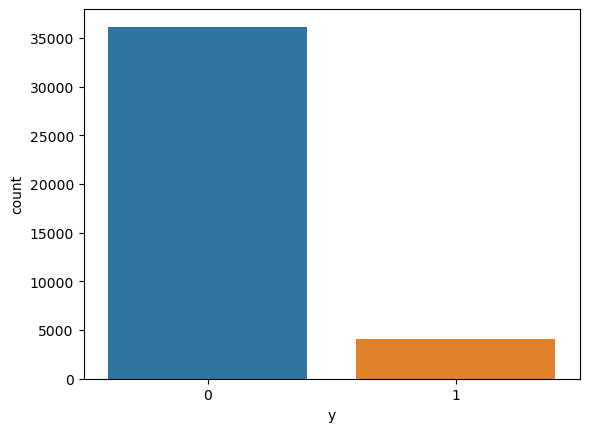

In [43]:
sns.countplot(x='y',data=df)

- We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

### Random Over-Sampling
- Oversampling can be defined as adding more copies to the minority class.

In [45]:
os =  RandomOverSampler()
x_new,y_new=os.fit_resample(x,y)

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


<AxesSubplot:xlabel='y', ylabel='count'>

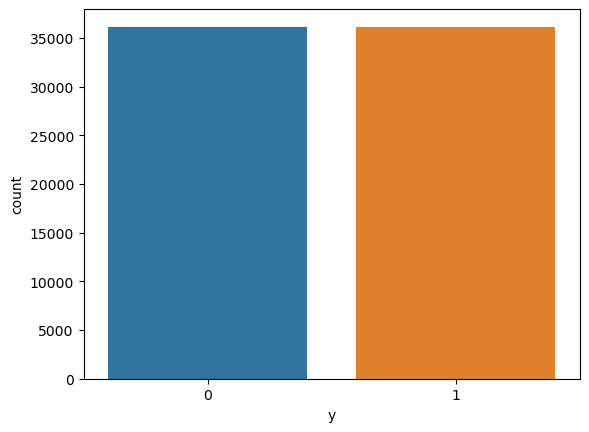

In [46]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

In [47]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.20,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(57848, 14) (14462, 14) (57848,) (14462,)


In [48]:
#feature scaling
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# Model Building

In [49]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [50]:
pred=model.predict(xtest)

In [61]:
model.coef_  # coefficients of features

array([[-0.1058011 ,  0.04383245,  0.24972429, -0.04819123,  0.16948984,
        -0.6723288 , -0.25600955, -0.07109355, -0.03453531,  1.48981231,
        -0.35967038,  0.35123102,  0.56871654,  0.30791229]])

In [67]:
model.predict_proba(xtest)

array([[0.83231736, 0.16768264],
       [0.78088076, 0.21911924],
       [0.24981827, 0.75018173],
       ...,
       [0.45449684, 0.54550316],
       [0.011416  , 0.988584  ],
       [0.51609193, 0.48390807]])

In [51]:
acc_lr=accuracy_score(ytest,pred)
acc_lr

0.7951182409072051

In [52]:
recall_lr=recall_score(ytest,pred)
recall_lr

0.7796308954203691

In [53]:
precision_lr=precision_score(ytest,pred)
precision_lr

0.8084774595973916

In [54]:
f1score_lr=f1_score(ytest,pred)
f1score_lr

0.7937921915234185

In [55]:
AUC_LR=roc_auc_score(pred,ytest)
AUC_LR

0.7954374339023674

[[5796 1351]
 [1612 5703]]


<AxesSubplot:>

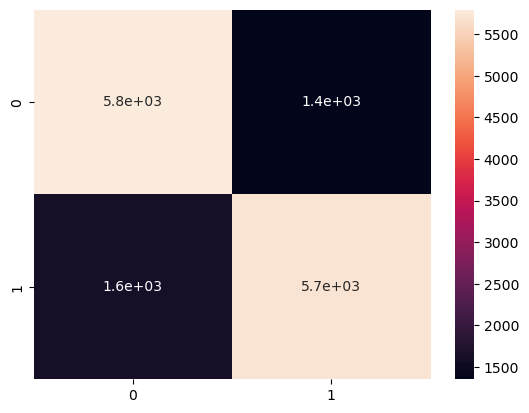

In [73]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [75]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      7408
           1       0.78      0.81      0.79      7054

    accuracy                           0.80     14462
   macro avg       0.80      0.80      0.80     14462
weighted avg       0.80      0.80      0.80     14462



In [76]:
Logit_roc_score=roc_auc_score(ytest,model.predict(xtest))
Logit_roc_score

0.7953002665152775

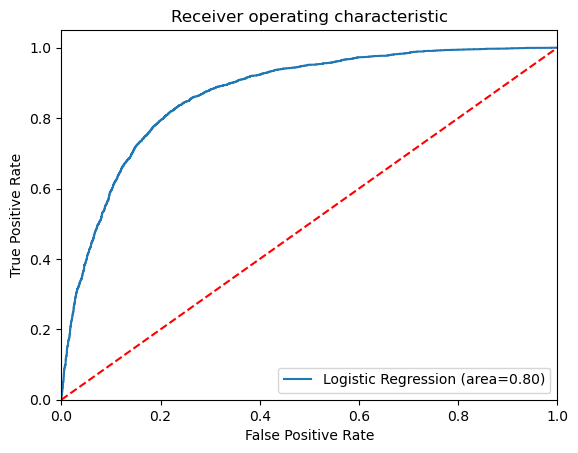

In [78]:
fpr, tpr, thresholds = roc_curve(ytest,model.predict_proba(xtest)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0
          , 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()